In [1]:
#File Reading and File Head Look
import pandas as pd
file_path=r'/content/drive/MyDrive/Colab Notebooks/Agricultural Production.csv'
data =pd.read_csv(file_path)
data.head()

,State,District,Crop,Year,Season,Area,Area Units,Production,Production Units,Yield
0,Andaman and Nicobar Islands,NICOBARS,Arecanut,2001-02,Kharif,1254.0,Hectare,2061.0,Tonnes,1.643541
1,Andaman and Nicobar Islands,NICOBARS,Arecanut,2002-03,Whole Year,1258.0,Hectare,2083.0,Tonnes,1.655803
2,Andaman and Nicobar Islands,NICOBARS,Arecanut,2003-04,Whole Year,1261.0,Hectare,1525.0,Tonnes,1.209358
3,Andaman and Nicobar Islands,NORTH AND MIDDLE ANDAMAN,Arecanut,2001-02,Kharif,3100.0,Hectare,5239.0,Tonnes,1.690000
4,Andaman and Nicobar Islands,SOUTH ANDAMANS,Arecanut,2002-03,Whole Year,3105.0,Hectare,5267.0,Tonnes,1.696296


In [2]:
#Checking for Missing Values
data.isnull().sum()

,0
State,0
District,0
Crop,32
Year,0
Season,1
Area,33
Area Units,0
Production,4993
Production Units,0
Yield,33


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345375 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345406 non-null  object 
 5   Area              345374 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        340414 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345374 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [4]:
# Handling Missing Values with the mode (most frequent value) for categorical features like Crop and Season,
#as these are often repetitive in agricultural data.
data['Crop'] = data['Crop'].fillna(data['Crop'].mode()[0])
data['Season'] = data['Season'].fillna(data['Season'].mode()[0])

In [5]:
#Checking for Missing Values
data.isnull().sum()

,0
State,0
District,0
Crop,0
Year,0
Season,0
Area,33
Area Units,0
Production,4993
Production Units,0
Yield,33


In [6]:
#Imputing with the mean or median for numerical features like Area, Production,
#and Yield. Given the large number of missing values in Production, imputation
#may be necessary to preserve as much data as possible.

data['Area'] = data['Area'].fillna(data['Area'].mean())
data['Production'] = data['Production'].fillna(data['Production'].mean())
data['Yield'] = data['Yield'].fillna(data['Yield'].mean())

In [7]:
#Checking for Missing Values
data.isnull().sum()

,0
State,0
District,0
Crop,0
Year,0
Season,0
Area,0
Area Units,0
Production,0
Production Units,0
Yield,0


In [8]:
# One-Hot Encoding for categorical columns
data_encoded = pd.get_dummies(data, columns=['State', 'District', 'Crop', 'Season'], drop_first=True)

In [9]:
print(data.columns)

Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Area Units',
       'Production', 'Production Units', 'Yield'],
      dtype='object')


In [10]:
print(data[['State', 'District', 'Crop']].dtypes)

State       object
District    object
Crop        object
dtype: object


In [11]:
print(data_encoded.head())

      Year    Area Area Units  Production Production Units     Yield  \
0  2001-02  1254.0    Hectare      2061.0           Tonnes  1.643541   
1  2002-03  1258.0    Hectare      2083.0           Tonnes  1.655803   
2  2003-04  1261.0    Hectare      1525.0           Tonnes  1.209358   
3  2001-02  3100.0    Hectare      5239.0           Tonnes  1.690000   
4  2002-03  3105.0    Hectare      5267.0           Tonnes  1.696296   

   State_Andhra Pradesh  State_Arunachal Pradesh  State_Assam  State_Bihar  \
0                 False                    False        False        False   
1                 False                    False        False        False   
2                 False                    False        False        False   
3                 False                    False        False        False   
4                 False                    False        False        False   

   ...  Crop_Tobacco  Crop_Turmeric  Crop_Urad  Crop_Wheat  \
0  ...         False          False 

In [12]:
print(data_encoded.columns)

Index(['Year', 'Area', 'Area Units', 'Production', 'Production Units', 'Yield',
       'State_Andhra Pradesh', 'State_Arunachal Pradesh', 'State_Assam',
       'State_Bihar',
       ...
       'Crop_Tobacco', 'Crop_Turmeric', 'Crop_Urad', 'Crop_Wheat',
       'Crop_other oilseeds', 'Season_Kharif', 'Season_Rabi', 'Season_Summer',
       'Season_Whole Year', 'Season_Winter'],
      dtype='object', length=829)


In [13]:
# Check a few columns to verify encoding
print(data_encoded[['State_Andhra Pradesh', 'Crop_Tobacco', 'Season_Winter']].head())


   State_Andhra Pradesh  Crop_Tobacco  Season_Winter
0                 False         False          False
1                 False         False          False
2                 False         False          False
3                 False         False          False
4                 False         False          False


In [14]:
data_encoded = pd.get_dummies(data, columns=['State', 'District', 'Crop', 'Season'], drop_first=True)
print(data_encoded.head())


      Year    Area Area Units  Production Production Units     Yield  \
0  2001-02  1254.0    Hectare      2061.0           Tonnes  1.643541   
1  2002-03  1258.0    Hectare      2083.0           Tonnes  1.655803   
2  2003-04  1261.0    Hectare      1525.0           Tonnes  1.209358   
3  2001-02  3100.0    Hectare      5239.0           Tonnes  1.690000   
4  2002-03  3105.0    Hectare      5267.0           Tonnes  1.696296   

   State_Andhra Pradesh  State_Arunachal Pradesh  State_Assam  State_Bihar  \
0                 False                    False        False        False   
1                 False                    False        False        False   
2                 False                    False        False        False   
3                 False                    False        False        False   
4                 False                    False        False        False   

   ...  Crop_Tobacco  Crop_Turmeric  Crop_Urad  Crop_Wheat  \
0  ...         False          False 

In [15]:
print(data_encoded.dtypes)

Year                  object
Area                 float64
Area Units            object
Production           float64
Production Units      object
                      ...   
Season_Kharif           bool
Season_Rabi             bool
Season_Summer           bool
Season_Whole Year       bool
Season_Winter           bool
Length: 829, dtype: object


In [16]:
object_columns = data_encoded.select_dtypes(include=['object']).columns
print(object_columns)

Index(['Year', 'Area Units', 'Production Units'], dtype='object')


In [17]:
unique_values = data['Production Units'].nunique()

print(f"Number of unique values: {unique_values}")

Number of unique values: 3


In [18]:
unique_values = data['Production Units'].unique()

print(unique_values)

['Tonnes' 'Nuts' 'Bales']


In [19]:
from sklearn.preprocessing import StandardScaler

# Features that need scaling
numerical_features = ['Area', 'Production', 'Yield']

# Initialize the scaler
scaler = StandardScaler()

# Fiting and transforming the numerical features
data_encoded[numerical_features] = scaler.fit_transform(data_encoded[numerical_features])

In [20]:
#Taking Snapshot of the Dataframe
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 345407 entries, 0 to 345406
Data columns (total 10 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   State             345407 non-null  object 
 1   District          345407 non-null  object 
 2   Crop              345407 non-null  object 
 3   Year              345407 non-null  object 
 4   Season            345407 non-null  object 
 5   Area              345407 non-null  float64
 6   Area Units        345407 non-null  object 
 7   Production        345407 non-null  float64
 8   Production Units  345407 non-null  object 
 9   Yield             345407 non-null  float64
dtypes: float64(3), object(7)
memory usage: 26.4+ MB


In [21]:
#looking at summary statistics (mean, median, standard deviation) to understand the spread of your Yield values:
print(data['Yield'].describe())

count    345407.000000
mean         79.407569
std         916.584956
min           0.000000
25%           0.546839
50%           1.000000
75%           2.467981
max       43958.333333
Name: Yield, dtype: float64


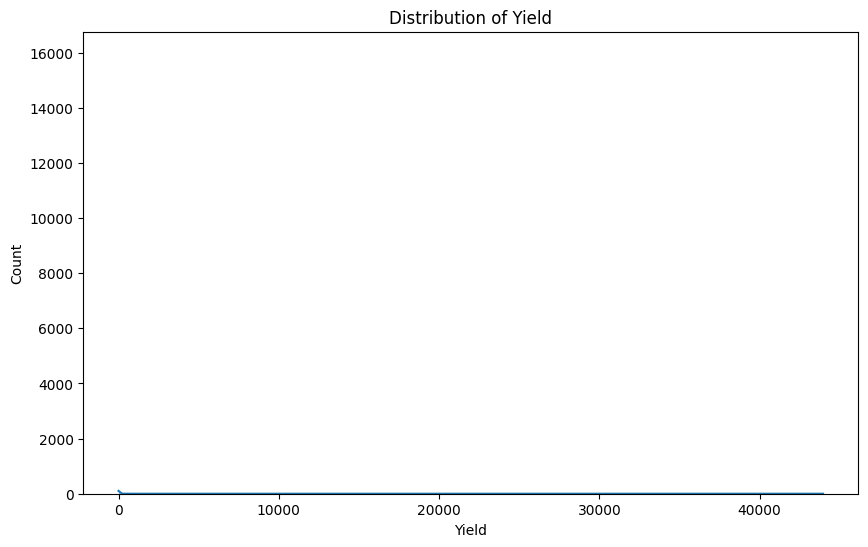

In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ploting the distribution of Yield
plt.figure(figsize=(10, 6))
sns.histplot(data['Yield'], kde=True)
plt.title('Distribution of Yield')
plt.show()

Yield data is heavily skewed, with the majority of values concentrated near zero and a few very high outliers (up to ~44,000), which is causing the rest of the data to be squeezed towards the lower end of the x-axis.

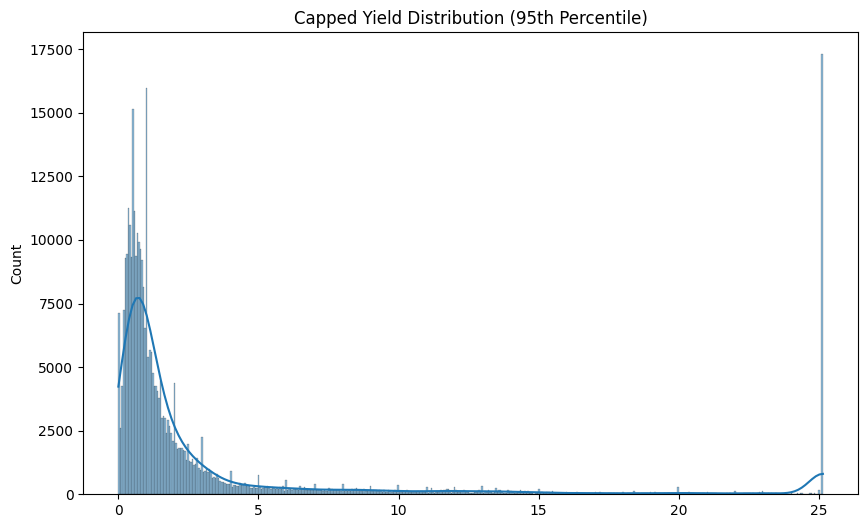

In [23]:
import numpy as np

# Caping at the 95th percentile
upper_limit = data['Yield'].quantile(0.95)
capped_yield = np.where(data['Yield'] > upper_limit, upper_limit, data['Yield'])

# Ploting the capped Yield distribution
plt.figure(figsize=(10, 6))
sns.histplot(capped_yield, kde=True)
plt.title('Capped Yield Distribution (95th Percentile)')
plt.show()

 caping the extreme values to focus on the bulk of the data. For example, consider plotting only up to the 95th percentile of Yield.


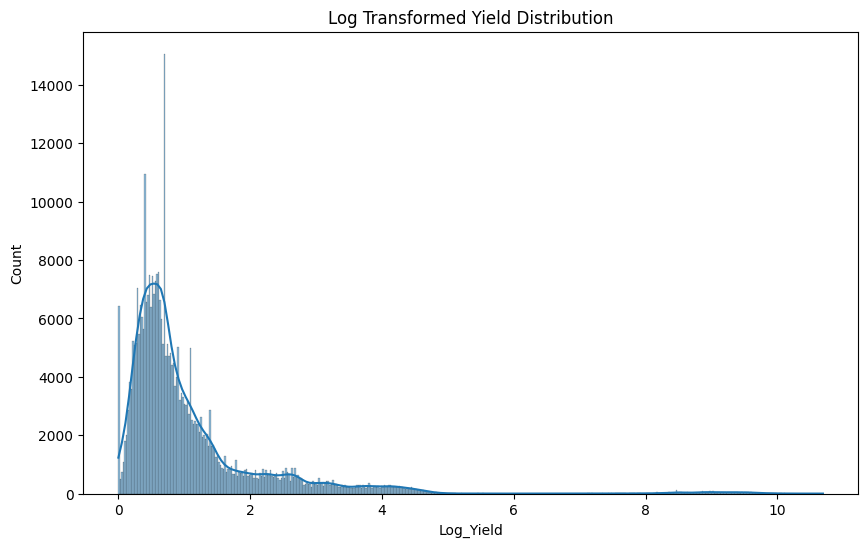

In [24]:
# Apply log transformation (adding a small constant to avoid log(0))
data['Log_Yield'] = np.log1p(data['Yield'])

# Plot the transformed Yield distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Log_Yield'], kde=True)
plt.title('Log Transformed Yield Distribution')
plt.show()

Log Transform the Data tocompress the outliers and give a more balanced view of the distribution.

In [25]:
from sklearn.model_selection import train_test_split

# Split the data (80% train, 20% test)
X = data.drop(['Yield', 'Log_Yield'], axis=1)  # Use other features except Yield and Log_Yield for training
y = data['Log_Yield']  # Use the log-transformed Yield for the prediction target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [26]:
#Checking data types after encoding
print(data_encoded.dtypes)

Year                  object
Area                 float64
Area Units            object
Production           float64
Production Units      object
                      ...   
Season_Kharif           bool
Season_Rabi             bool
Season_Summer           bool
Season_Whole Year       bool
Season_Winter           bool
Length: 829, dtype: object


In [27]:
# # # trying to train model but error due to different data type

from sklearn.ensemble import RandomForestRegressor

# Initialize the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
rf_pred = rf_model.predict(X_test)

# Evaluate Random Forest performance
rf_mse = mean_squared_error(y_test, rf_pred)
rf_mae = mean_absolute_error(y_test, rf_pred)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest Regression - MSE: {rf_mse}, MAE: {rf_mae}, R-squared: {rf_r2}")

ValueError: could not convert string to float: 'Nagaland'

In [28]:
# Checking the data types
print(X_train.dtypes)

State                object
District             object
Crop                 object
Year                 object
Season               object
Area                float64
Area Units           object
Production          float64
Production Units     object
dtype: object


In [29]:
# checking all data types with objects
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
print(X_train[non_numeric_cols].head())

               State        District               Crop     Year      Season  \
160207      Nagaland            PHEK               Rice  2010-11      Kharif   
32706     Tamil Nadu  RAMANATHAPURAM          Cashewnut  2003-04  Whole Year   
51548   Chhattisgarh         SURGUJA              Maize  2004-05      Kharif   
141986       Gujarat         NARMADA  Moong(Green Gram)  2012-13      Summer   
264460    Tamil Nadu     KRISHNAGIRI               Ragi  2017-18      Kharif   

       Area Units Production Units  
160207    Hectare           Tonnes  
32706     Hectare           Tonnes  
51548     Hectare           Tonnes  
141986    Hectare           Tonnes  
264460    Hectare           Tonnes  


In [30]:
# Applying one-hot encoding to categorical columns
X_train_encoded = pd.get_dummies(X_train, columns=['State', 'District', 'Crop', 'Season', 'Year', 'Area Units', 'Production Units'], drop_first=True)

# Checking the data types after encoding
print(X_train_encoded.dtypes)


Area                       float64
Production                 float64
State_Andhra Pradesh          bool
State_Arunachal Pradesh       bool
State_Assam                   bool
                            ...   
Year_2018-19                  bool
Year_2019-20                  bool
Year_2020-21                  bool
Production Units_Nuts         bool
Production Units_Tonnes       bool
Length: 846, dtype: object


In [31]:
# Applying the same one-hot encoding to the test data
X_test_encoded = pd.get_dummies(X_test, columns=['State', 'District', 'Crop', 'Season', 'Year', 'Area Units', 'Production Units'], drop_first=True)

# Aligning the columns in test data to match training data
X_train_encoded, X_test_encoded = X_train_encoded.align(X_test_encoded, join='left', axis=1, fill_value=0)


In [32]:
#checking is there any null in training data after encoding
print(X_train_encoded.isnull().sum())


Area                       0
Production                 0
State_Andhra Pradesh       0
State_Arunachal Pradesh    0
State_Assam                0
                          ..
Year_2018-19               0
Year_2019-20               0
Year_2020-21               0
Production Units_Nuts      0
Production Units_Tonnes    0
Length: 846, dtype: int64


In [ ]:
# # # System was crashing due to excessive Ram usage on-Cloud and Off-Cloud # # #
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

lr_model = LinearRegression()
lr_model.fit(X_train_encoded, y_train)
y_pred_lr = lr_model.predict(X_test_encoded)
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R^2 Score:", r2_score(y_test, y_pred_lr))


In [33]:
#tried DownSampling to avoid overloading Resources

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

#Down Sampling
X_sampled, _, y_sampled, _ = train_test_split(X_train_encoded, y_train, test_size=0.9, random_state=42)

In [35]:
## Linear Regression

#Initializing
lr_model = LinearRegression()

#Training
lr_model.fit(X_sampled, y_sampled)

#Prediction and Evaluation
y_pred_lr = lr_model.predict(X_test_encoded)
print("Linear Regression")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_lr))
print("R^2 Score:", r2_score(y_test, y_pred_lr))

Linear Regression
Mean Squared Error: 6133.196068944414
R^2 Score: -4705.136504008494


In [36]:
# Random Forest

#Initializing
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

#Training
rf_model.fit(X_sampled, y_sampled)

#Prediction and Evaluation
y_pred_rf = rf_model.predict(X_test_encoded)
print("Random Forest")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_rf))
print("R^2 Score:", r2_score(y_test, y_pred_rf))

Random Forest
Mean Squared Error: 0.022721773204039765
R^2 Score: 0.9825650826894667


In [37]:
#Gradient Boosting

#Initializing
gb_model = GradientBoostingRegressor(n_estimators=100, random_state=42)

#Training
gb_model.fit(X_sampled, y_sampled)

#Prediction and Evaluation
y_pred_gb = gb_model.predict(X_test_encoded)
print("Gradient Boosting")
print("Mean Squared Error:", mean_squared_error(y_test, y_pred_gb))
print("R^2 Score:", r2_score(y_test, y_pred_gb))

Gradient Boosting
Mean Squared Error: 0.06346909413092228
R^2 Score: 0.951298765373191


Linear Regression:
Mean Squared Error (MSE): 6133.19
R² Score: -4705.13
The negative R² score and high MSE indicate that the Linear Regression model is performing very poorly. This could suggest that the data is not well-suited for a linear model, meaning that a straight-line approximation is not capturing the relationship between the input features and the target variable effectively.

**Random Forest:
Mean Squared Error (MSE): 0.0227
R² Score: 0.98
The Random Forest model has performed exceptionally well, with a very low MSE and a high R² score close to 1. This suggests that it can explain 98.26% of the variance in the data, indicating that it's a very good fit for the problem**

Gradient Boosting:
Mean Squared Error (MSE): 0.0635
R² Score: 0.95
The Gradient Boosting model also performs well, though slightly worse than Random Forest. Its R² score of 0.95 indicates that it explains 95.13% of the variance, which is still strong but slightly less optimal compared to the Random Forest.